# HT7. Support Vector Machine

## Miembros
- Francisco Javier Castillo Cerna 21562
- Fernanda Esquivel de León 21542
- Andrés Estuardo Montoya 21552

## Link al repositorio 
El repositorio puede ser visualizado [acá](https://github.com/FerEsq/DM-House-Saleprice-Predictor/tree/SVM)

# 1. Use los mismos conjuntos de entrenamiento y prueba de las hojas de trabajo pasadas para probar el algoritmo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [5]:
df["MSZoning"] = le.fit_transform(df["MSZoning"])
df["Street"] = le.fit_transform(df["Street"])
df["Alley"] = le.fit_transform(df["Alley"])
df["LotShape"] = le.fit_transform(df["LotShape"])
df["LandContour"] = le.fit_transform(df["LandContour"])
df["Utilities"] = le.fit_transform(df["Utilities"])
df["LotConfig"] = le.fit_transform(df["LotConfig"])
df["LandSlope"] = df["LandSlope"].map({
    "Gtl": 1,
    "Mod": 2,
    "Sev": 3
})
df["Neighborhood"] = le.fit_transform(df["Neighborhood"])
df["Condition1"] = le.fit_transform(df["Condition1"])
df["Condition2"] = le.fit_transform(df["Condition2"])
df["BldgType"] = le.fit_transform(df["BldgType"])
df["HouseStyle"] = le.fit_transform(df["HouseStyle"])
df["RoofStyle"] = le.fit_transform(df["RoofStyle"])
df["RoofMatl"] = le.fit_transform(df["RoofMatl"])
df["Exterior1st"] = le.fit_transform(df["Exterior1st"])
df["Exterior2nd"] = le.fit_transform(df["Exterior2nd"])
df["MasVnrType"] = le.fit_transform(df["MasVnrType"])

condition_map = {
    "Ex": 5,
    "Gd": 4,
    "TA": 3,
    "Fa": 2,
    "Po": 1,
    "NA": 0,
}
df["ExterQual"] = df["ExterQual"].map(condition_map)
df["ExterCond"] = df["ExterCond"].map(condition_map)
df["Foundation"] = le.fit_transform(df["Foundation"])
df["BsmtQual"] = df["BsmtQual"].map(condition_map)
df["BsmtCond"] = df["BsmtCond"].map(condition_map)
df["BsmtExposure"] = df["BsmtExposure"].map({
    "Gd": 4,
    "Av": 3,
    "Mn": 2,
    "No": 1,
    "NA": 0
})
df["BsmtFinType1"] = df["BsmtFinType1"].map({
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,
    "LwQ": 2,
    "Unf": 1,
    "NA": 0
})
df["BsmtFinType2"] = df["BsmtFinType2"].map({
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,
    "LwQ": 2,
    "Unf": 1,
    "NA": 0
})
df["Heating"] = le.fit_transform(df["Heating"])
df["HeatingQC"] = df["HeatingQC"].map(condition_map)
df["CentralAir"] = le.fit_transform(df["CentralAir"])
df["Electrical"] = df["Electrical"].map({
    "SBrkr": 5,
    "FuseA": 4,
    "FuseF": 3,
    "FuseP": 2,
    "Mix": 1,
    "NA": 0
})
df["KitchenQual"] = df["KitchenQual"].map(condition_map)
df["Functional"] = le.fit_transform(df["Functional"])
df["FireplaceQu"] = df["FireplaceQu"].map(condition_map)
df["GarageType"] = le.fit_transform(df["GarageType"])
df["GarageFinish"] = df["GarageFinish"].map({
    "Fin": 3,
    "RFn": 2,
    "Unf": 1,
    "NA": 0
})
df["GarageQual"] = df["GarageQual"].map(condition_map)
df["GarageCond"] = df["GarageCond"].map(condition_map)
df["PavedDrive"] = df["PavedDrive"].map({
    "Y": 3,
    "P": 2,
    "N": 1,
    "NA": 0
})
df["PoolQC"] = df["PoolQC"].map(condition_map)
df["Fence"] = df["Fence"].map({
    "GdPrv": 4,
    "MnPrv": 3,
    "GdWo": 2,
    "MnWw": 1,
    "NA": 0
})
df["MiscFeature"] = le.fit_transform(df["MiscFeature"])
df["SaleType"] = le.fit_transform(df["SaleType"])
df["SaleCondition"] = le.fit_transform(df["SaleCondition"])

for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(0)

In [6]:
df.info()
original_df = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 2. Explore los datos y explique las transformaciones que debe hacerle para generar un modelo de máquinas vectoriales de soporte

Dada la manera en la que se trabaja este modelo, es necesario realizar una normalización de los datos, para que estos puedan ser trabajados de manera correcta.

In [7]:
df.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,0.0,0.0,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,0.0,0.0,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,0.0,0.0,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,0.0,0.0,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,0.0,0.0,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,0.0,0.0,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,0.0,3.0,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,0.0,4.0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,0.0,0.0,4,0,4,2010,8,4,142125


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'int32', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [10]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,-0.045532,0.212877,-0.207142,0.064238,0.244717,0.750731,0.314667,-0.02618,...,-0.068692,-0.066236,-0.469867,0.191594,-0.087688,-1.599111,0.138777,0.313867,0.208502,0.347273
1,-1.728492,-0.872563,-0.045532,0.645747,-0.091886,0.064238,0.244717,0.750731,0.314667,-0.02618,...,-0.068692,-0.066236,-0.469867,0.191594,-0.087688,-0.489110,-0.614439,0.313867,0.208502,0.007288
2,-1.726120,0.073375,-0.045532,0.299451,0.073480,0.064238,0.244717,-1.378933,0.314667,-0.02618,...,-0.068692,-0.066236,-0.469867,0.191594,-0.087688,0.990891,0.138777,0.313867,0.208502,0.536154
3,-1.723747,0.309859,-0.045532,0.068587,-0.096897,0.064238,0.244717,-1.378933,0.314667,-0.02618,...,-0.068692,-0.066236,-0.469867,0.191594,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,-0.515281
4,-1.721374,0.073375,-0.045532,0.761179,0.375148,0.064238,0.244717,-1.378933,0.314667,-0.02618,...,-0.068692,-0.066236,-0.469867,0.191594,-0.087688,2.100892,0.138777,0.313867,0.208502,0.869843


# 3. Use como variable respuesta la variable categórica que especifica si la casa es barata, media o cara

In [11]:
def classify_house(price):
    if price < lower_limit:
        return 'Economical' 
    elif price < upper_limit:
        return 'Intermediate'
    else:
        return 'Expensive'

In [12]:
lower_limit = np.percentile(df['SalePrice'], 33)
upper_limit = np.percentile(df['SalePrice'], 66)

In [13]:
df['Classification'] = df['SalePrice'].apply(classify_house)
df['Classification'] = df['Classification'].map({
    'Economical': 0,
    'Intermediate': 1,
    'Expensive': 2
})

In [14]:
print(df[['SalePrice', 'Classification']].head())

   SalePrice  Classification
0   0.347273               2
1   0.007288               1
2   0.536154               2
3  -0.515281               1
4   0.869843               2


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['SalePrice', 'Classification'], axis=1)
y = df['Classification']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Genere varios (más de 2) modelos de SVM con diferentes kernels y distintos valores en los parámetros c, gamma (circular) y d (en caso de que utilice el polinomial). Puede tunear el modelo de forma automática siempre que explique los resultados

In [18]:
from sklearn.svm import SVC, SVR

In [19]:
model_linear = SVC(kernel='linear', C=1)
model_linear.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [20]:
model_rbf = SVC(kernel='rbf', C=1, gamma=0.1)
model_rbf.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [21]:
model_poly = SVC(kernel='poly', C=1, degree=3)
model_poly.fit(X_train, y_train)

SVC(C=1, kernel='poly')

# 5. Use los modelos para predecir el valor de la variable respuesta

In [22]:
y_pred_linear = model_linear.predict(X_test)

In [23]:
y_pred_rbf = model_rbf.predict(X_test)

In [24]:
y_pred_poly = model_poly.predict(X_test)

# 6. Evaluación

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

## 6.1 Linear

<Axes: >

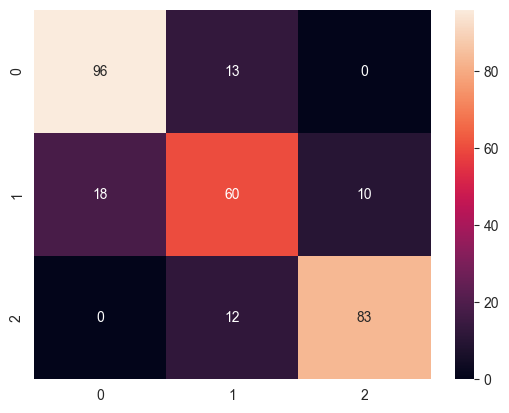

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True)

## 6.2 RBF

<Axes: >

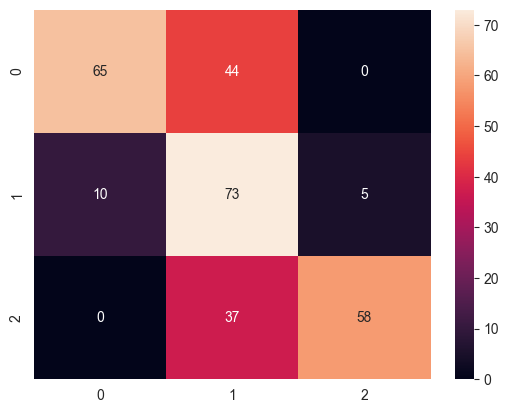

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True)

## 6.3 Poly

<Axes: >

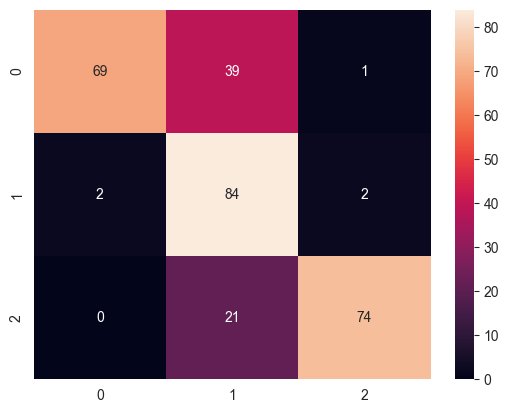

In [28]:
sns.heatmap(confusion_matrix(y_test, y_pred_poly), annot=True)

# 7. Analice si los modelos están sobreajustados o desajustados. ¿Qué puede hacer para manejar el sobreajuste o desajuste?

## 7.1 Linear

In [29]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       109
           1       0.71      0.68      0.69        88
           2       0.89      0.87      0.88        95

    accuracy                           0.82       292
   macro avg       0.81      0.81      0.81       292
weighted avg       0.82      0.82      0.82       292



El modelo con el kernel lineal tiene métricas de desempeño bastante buenas, donde podemos ver que no hay overfitting ni underfitting. Esot se podría mejorar con tuneo de hiperparámetros.

## 7.2 RBF

In [30]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.87      0.60      0.71       109
           1       0.47      0.83      0.60        88
           2       0.92      0.61      0.73        95

    accuracy                           0.67       292
   macro avg       0.75      0.68      0.68       292
weighted avg       0.77      0.67      0.68       292



A pesar de que el modelo no se ve que tenga overfitting podemos asumir un poco de underfitting; se ve que tiene un desempeño mucho más bajo en comparación a los otros modelos. Se podría mejorar con tuneo de hiperparámetros.

## 7.3 Poly

In [31]:
print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       0.97      0.63      0.77       109
           1       0.58      0.95      0.72        88
           2       0.96      0.78      0.86        95

    accuracy                           0.78       292
   macro avg       0.84      0.79      0.78       292
weighted avg       0.85      0.78      0.78       292



Este modelo es el segundo mejor de los tres, pero su desempeño se acerca al RBF. No presenta ni overfitting ni underfitting. Se podría mejorar con tuneo de hiperparámetros.

# 8. Compare los resultados obtenidos con los diferentes modelos que hizo en cuanto a efectividad, tiempo de procesamiento y equivocaciones

## 8.1 Kernel Lineal

Este modelo fue el que mejor se desempeñó respecto a los tres, obteniendo la mayor cantidad de aciertos para las categorías en la matriz de confusión. A pesar de que fue el más lento de todos, la diferencia del tiempo de procesamiento varía por milésimas de segundo por lo que es irrelevante.

Se puede observar que este modelo tiene una cantidad baja de errores tipo I y II, suele equivocarse principalmente al clasificar las viviendas económicas de las intermedias.

## 8.2 Kernel Polinómico

Este modelo fue el segundo con mejor desempeño, este obtiene una gran cantidad de aciertos para las diferentes categorías en la matriz de confusión y es un poco más rápido al procesar los datos en comparación al modelo lineal.

Se puede observar que este modelo tiene una gran cantidad de errores a la hora de intentar clasificar las viviendas con un precio intermedio, dando falsos positivos cuando una vivienda es cara y también una gran cantidad de falsos negativos cuando una vivienda es clasificada como barata.

## 8.3 Kernel RBF

Este modelo tuvo el peor desempeño entre los tres. A pesar de que también obtuvo una gran cantidad de aciertos, es el modelo que más errores cometió. Este modelo obtuvo un tiempo similar al modelo polinómico, por lo que la diferencia es irrelevante.

El modelo se equivoca en los mismos aspectos que el modelo polinómico, pero este posee una cantidad mayor de errores.

# 9. Compare la eficiencia del mejor modelo de SVM con los resultados obtenidos en los algoritmos de las hojas de trabajo anteriores que usen la misma variable respuesta

El modelo de SVM, utilizando un kernel lineal, es el modelo que mejor ha podido predecir la clasificación de las viviendas. Este suele tener una precisión arriba de 80% a la hora de clasificar las viviendas. Se puede observar que todos los modelos suelen tener muchos problemas a la hora de diferenciar viviendas con precio intermedio de las viviendas caras. El modelo SVM lineal suele tener una cantidad menor de errores a la hora de diferenciar los precios anteriormente mencionados, pero aumentan los errores al diferenciar las casas baratas de las de precio intermedio.

# 10. Genere un buen modelo de regresión, use para esto la variable del precio de la casa directamente.

In [32]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [35]:
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

In [36]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

In [37]:
svr.fit(X_train_scaled, y_train_scaled)

SVR(C=100, gamma=0.1)

In [38]:
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

In [39]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.9338984308612861
R2 Score: 0.23211871248543214


# 11. Compare los resultados del modelo de regresión generado con los de hojas anteriores que utilicen la misma variable

#### 11.1 Resultados de regresión lineal
![Linear Regression Results](data/LinearRegressionResults.png)

#### 11.2 Resultados de árbol de regresión
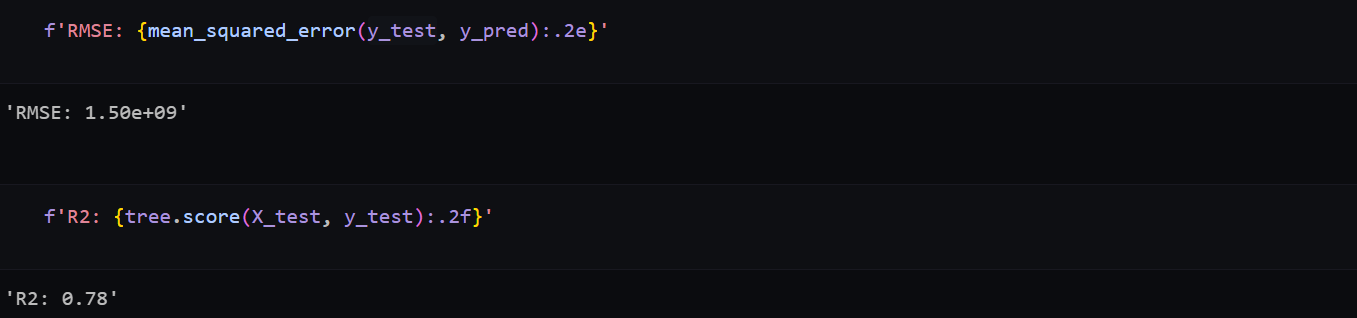

#### 11.3 Resultados de Naive-Bayes
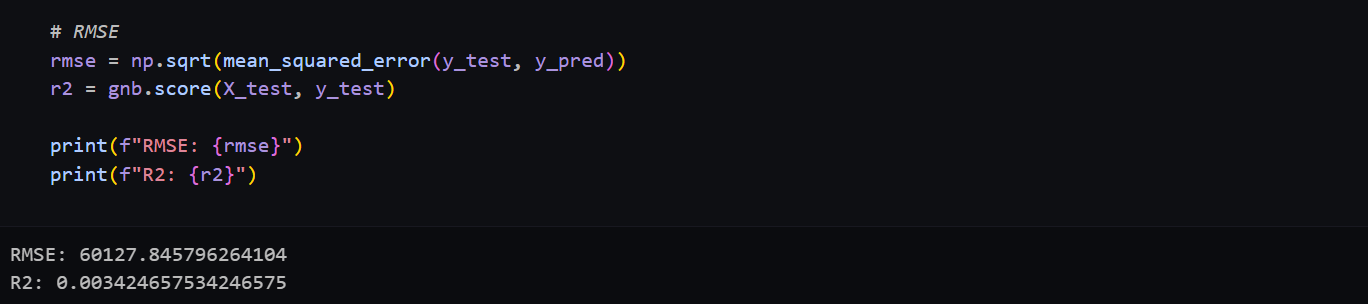

En general, el modelo de regresión SVM ofrece un error cuadrático medio mucho menor en comparación con los modelos de regresión lineal y árbol de regresión, lo que indica que, en este caso, ha proporcionado predicciones más cercanas al valor real de los precios de las casas. Sin embargo, el coeficiente de determinación R² del modelo SVM es inferior, lo que sugiere que, aunque las predicciones son cercanas en valor a las reales, la variabilidad de los precios de las casas no se captura tan completamente como en el árbol de regresión. El modelo Naive-Bayes tiene un R² mucho más bajo que los demás modelos, indicando un ajuste y una capacidad predictiva muy pobres en comparación. 

En conclusión, cada modelo ofrece ventajas y desventajas: mientras que los modelos de regresión lineal y árbol capturan mejor la variabilidad de los datos, el modelo SVM proporciona predicciones más precisas sobre valores individuales.

# 12. Genere un informe de los resultados y las explicaciones

El documento ser visualizado [acá](https://docs.google.com/document/d/1seaG1I0k1og5jQtHumW101QoETn3ZTx6bhqSXtDqjPY/edit?usp=sharing)